### **Step 1:** Load MNIST Dataset and Split Data

We’re using the classic MNIST handwritten digits dataset (70,000 grayscale 28x28 images).

- `X`: Features (784-pixel flattened vectors)
- `y`: Labels (strings: '0'–'9')

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(np.uint8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

### **Step 2:** Add Random Noise

* `X_train_mod` and `X_test_mod:` noisy versions of images
* `y_train_mod` and `y_test_mod:` clean versions (our prediction targets)
                                              
> This sets up a denoising problem — learning to recover original data from noise.

In [3]:
np.random.seed(42)  # For reproducibility

# Add noise: random ints between 0 and 100
noise_train = np.random.randint(0, 100, (len(X_train), 784))
noise_test = np.random.randint(0, 100, (len(X_test), 784))

# Create noisy versions
X_train_mod = X_train + noise_train
X_test_mod = X_test + noise_test

# Targets = original clean images
y_train_mod = X_train
y_test_mod = X_test

### **Step 3:** Visualize Noisy and Clean Images
> We visualize a noisy digit (what the model sees) and its clean counterpart (what the model should predict). This helps us visually confirm that the task makes sense.

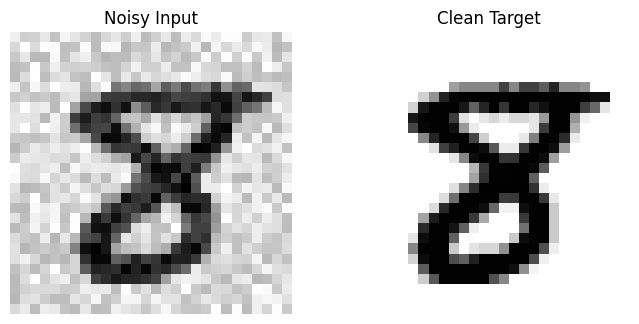

In [4]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# Compare noisy input vs clean target
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_digit(X_test_mod[0])
plt.title("Noisy Input")

plt.subplot(1, 2, 2)
plot_digit(y_test_mod[0])
plt.title("Clean Target")

plt.show()

### **Step 4**: Train a Multioutput Classifier
Each sample in `y_train_mod` has **784 outputs** (pixel intensities).
KNN can handle **ultioutput targets**, so it learns how to map noisy digits to their clean versions.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### **Step 5**: Predict a Clean Image
We give the model a **new noisy digit**, and it returns a **784-length vector** (predicted pixel values) — which we reshape into a clean image.

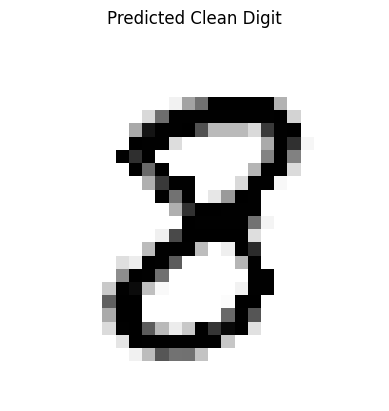

In [11]:
clean_prediction = knn_clf.predict([X_test_mod[0]])

plot_digit(clean_prediction)
plt.title("Predicted Clean Digit")
plt.show()